In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from pathlib import Path

# Training Data Analysis

In [2]:
path = '/Users/mychalsalgado/CS4662/petfinder-pawpularity-score/'
df = pd.read_csv(path + 'train.csv')
df.head()

Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  
0          0      1        0      0          0     0     0           63  
1          0      0        0      0          0     0     0           42  
2          0      0        0      1          1     0     0           28  
3          0      0        0      0          0     0     0           15  
4          0      1        0      0          0     0     0           72

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


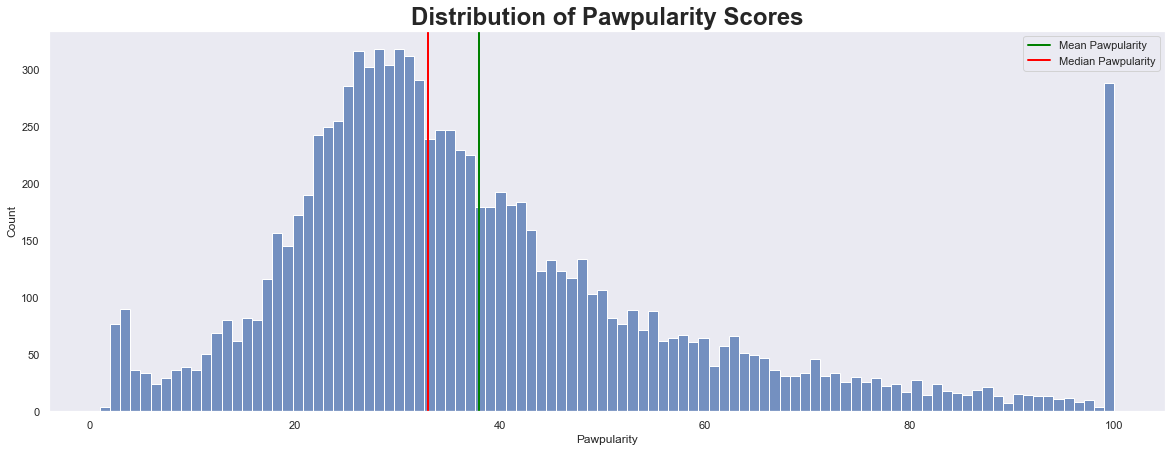

Mean Pawpularity:  38.03904358353511
Median Pawpularity:  33.0


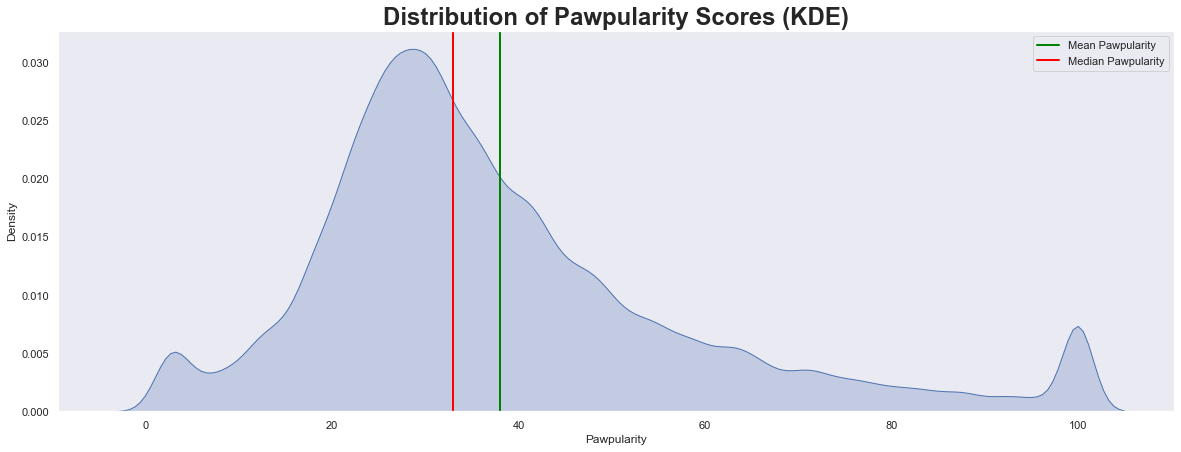

In [3]:
sns.set(rc={'figure.figsize':(20,7)})
fig = plt.figure()

sns.set_theme(style='dark')
sns.histplot(data=df, x='Pawpularity', bins=100)

mean_pawpularity = df['Pawpularity'].mean()
median_pawpularity = df['Pawpularity'].median()

plt.axvline(mean_pawpularity, c='green', ls='-', lw=2, label='Mean Pawpularity')
plt.axvline(median_pawpularity, c='red', ls='-', lw=2, label='Median Pawpularity')
plt.title('Distribution of Pawpularity Scores', fontsize=24, fontweight='bold')
plt.legend()
plt.show()
print('Mean Pawpularity: ', mean_pawpularity)
print('Median Pawpularity: ', median_pawpularity)

sns.set(rc={'figure.figsize':(20,7)})
sns.set_theme(style='dark')
fig = plt.figure()
sns.kdeplot(data=df, x='Pawpularity', bw_adjust=0.5, shade=True)
plt.axvline(df['Pawpularity'].mean(), c='green', ls='-', lw=2, label='Mean Pawpularity')
plt.axvline(df['Pawpularity'].median(),c='red',ls='-',lw=2, label='Median Pawpularity')
plt.title('Distribution of Pawpularity Scores (KDE)', fontsize=24, fontweight='bold')
plt.legend()
plt.show()

## Observations of Distribution of Pawpularity Scores
#### Analyzing the histogram and Kernel density estimation (KDE), it is noticeable that there is a skew in the distribution of pawpularity scores, as well as a small curve near zero. 

#### Another interesting observation is that there are nearly 300 pawpularity scores at 100. These observations raise some questions that we will consider as we continue to build our model:

##### Is there a specific breed, color, or age of animal that is more popular among the site's visitors?

##### Are there certain characteristics of the photos that lead to more clicks and higher pawpularity scores?

##### Could the outliers at the high end of the scores be affecting the models we build, and should they be removed from the training data?

/var/folders/s3/syynhn0x77x6xvq9r64bdm_00000gn/T/ipykernel_43354/1399594817.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/s3/syynhn0x77x6xvq9r64bdm_00000gn/T/ipykernel_43354/1399594817.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/s3/syynhn0x77x6xvq9r64bdm_00000gn/T/ipykernel_43354/1399594817.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/s3/syynhn0x77x6xvq9r64bdm_00000gn/T/ipykernel_43354/1399594817.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/s3/syynhn0x77x6xvq9r64bdm_00000gn/T/ipykern

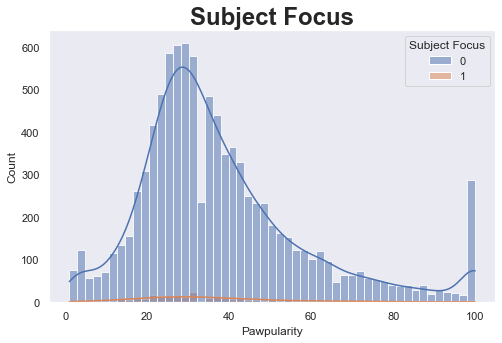

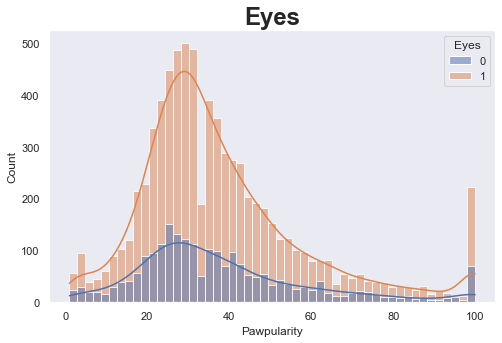

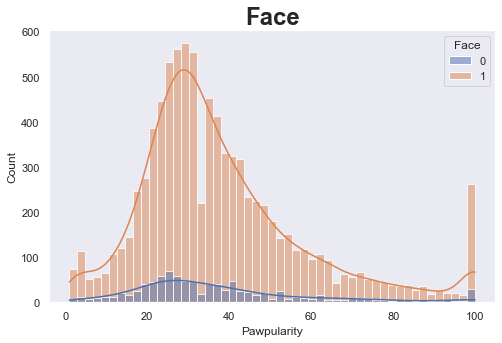

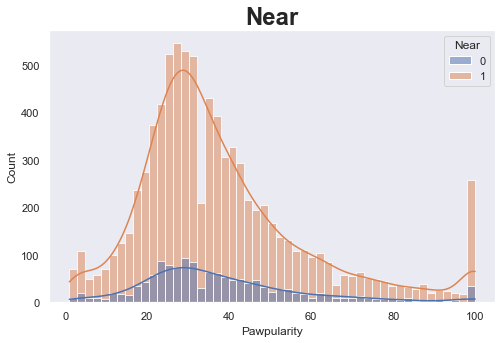

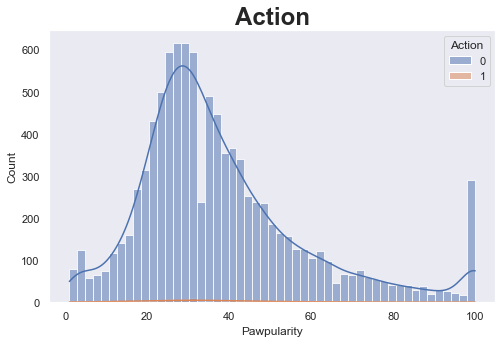

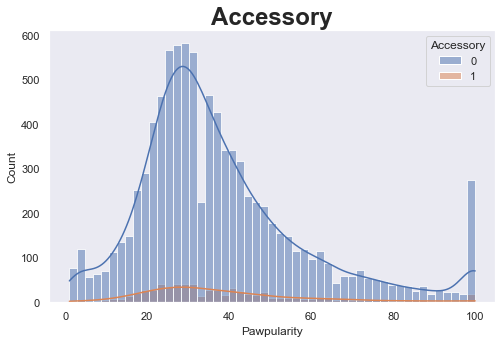

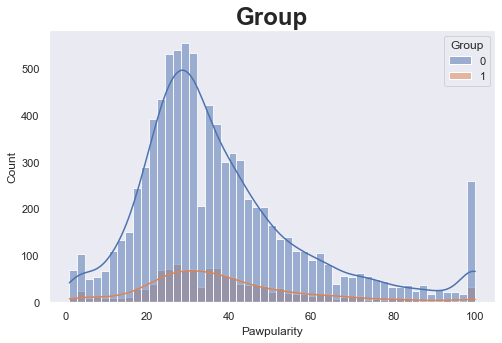

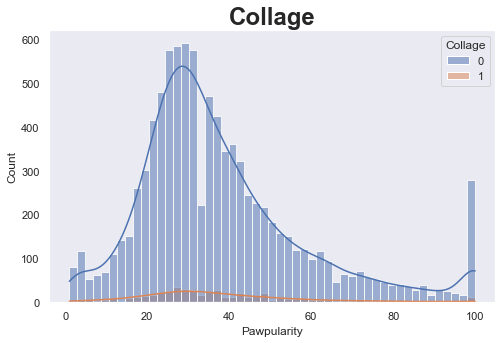

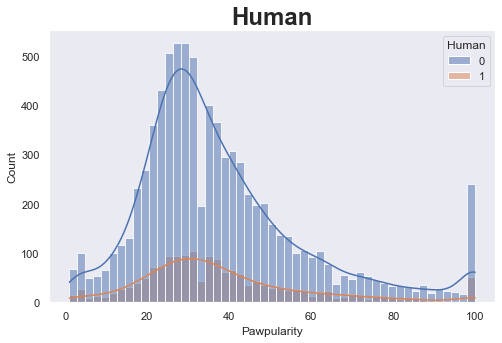

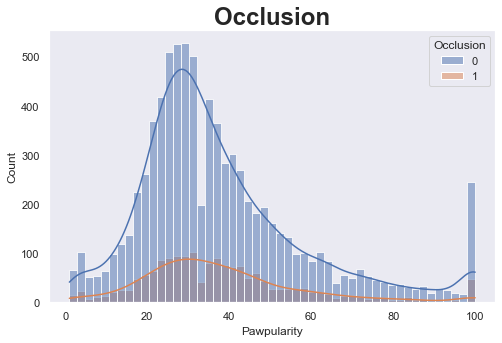

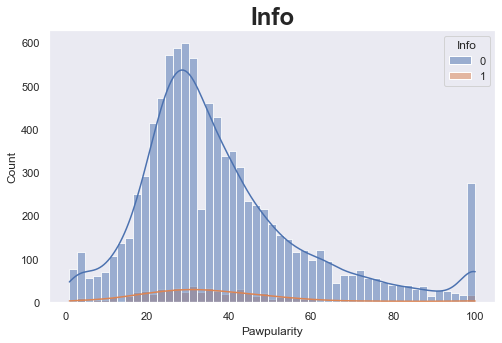

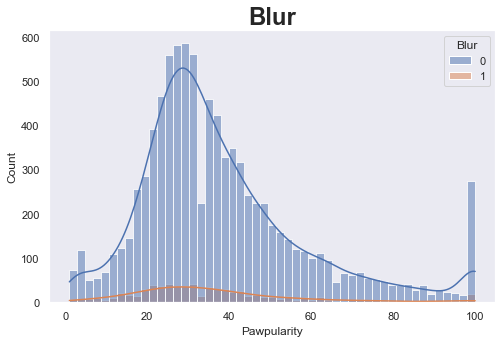

In [4]:
feature_variables = df.columns.values.tolist()
feature_variables = feature_variables[1:-1]

for variable in feature_variables:
    fig, ax = plt.subplots(figsize=(8, 5))
    sns.set_theme(style='dark')
    sns.histplot(df, x="Pawpularity", hue=variable, kde=True, ax=ax)
    plt.title(variable, fontsize=24, fontweight='bold')
    fig.show()


## Observations of Histogram Plots 

#### Upon examining the histogram plots of the feature variables against the pawpularity scores, the graphs suggests that models built on these charts may not yield exceptional results. The distribution of pawpularity scores appears similarly for each variable and class, which indicates a limited influence of the features on pawpularity scores. Variations in the features do not seem to significantly impact the distribution of the pawpularity scores.

# Image Training Data Analysis

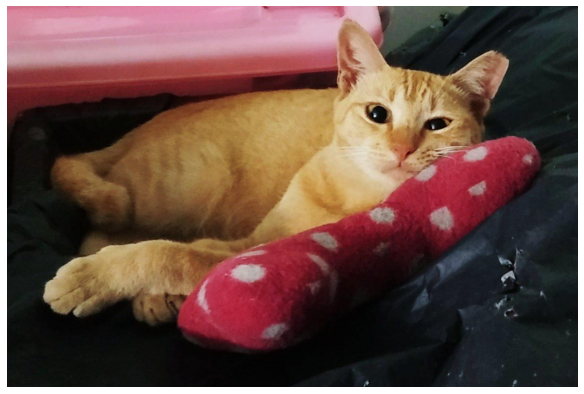

(854, 1280, 3)


In [5]:
df_img = glob(path + "train/*.jpg")

img_path = df_img[0]
img_arr = plt.imread(img_path) 
img_id = Path(df_img[0]).stem

plt.imshow(img_arr)
plt.axis('off')
plt.show()

img_df = df.loc[df['Id'] == img_id]
print(img_arr.shape)

4 Random Images of Pets With Pawpularity Score 100


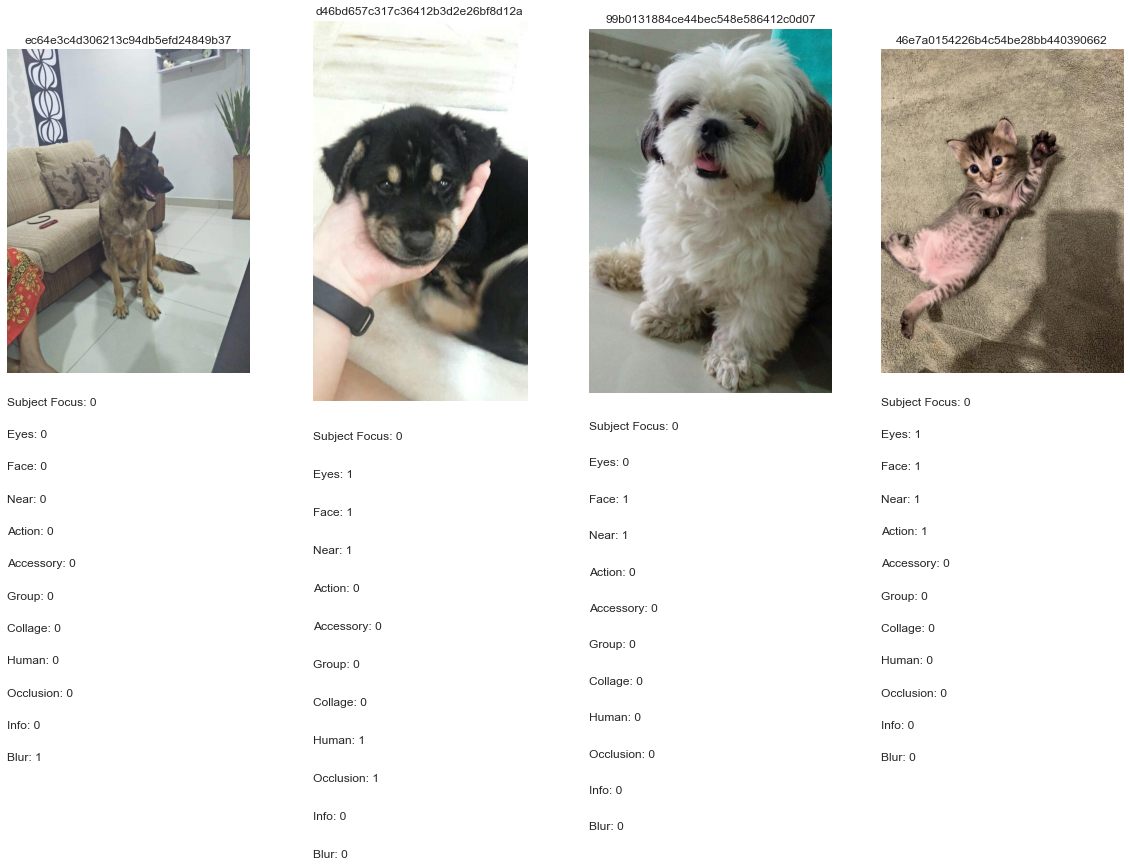

4 Random Images of Pets With Pawpularity Score 90


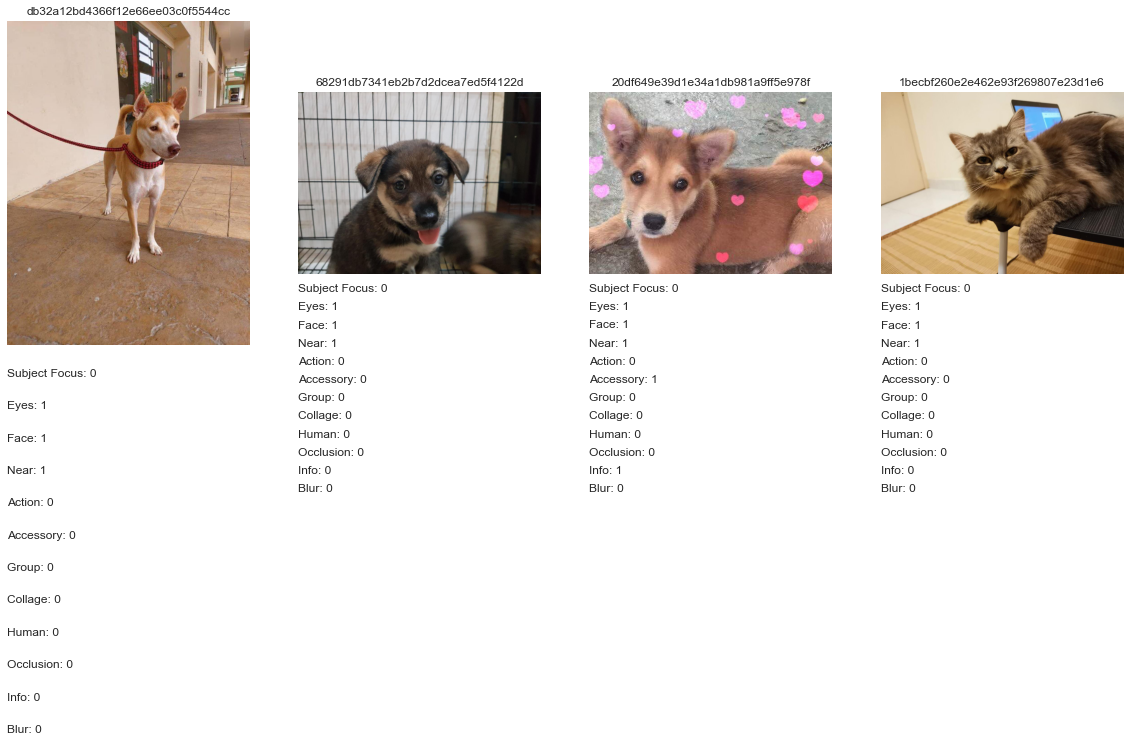

4 Random Images of Pets With Pawpularity Score 80


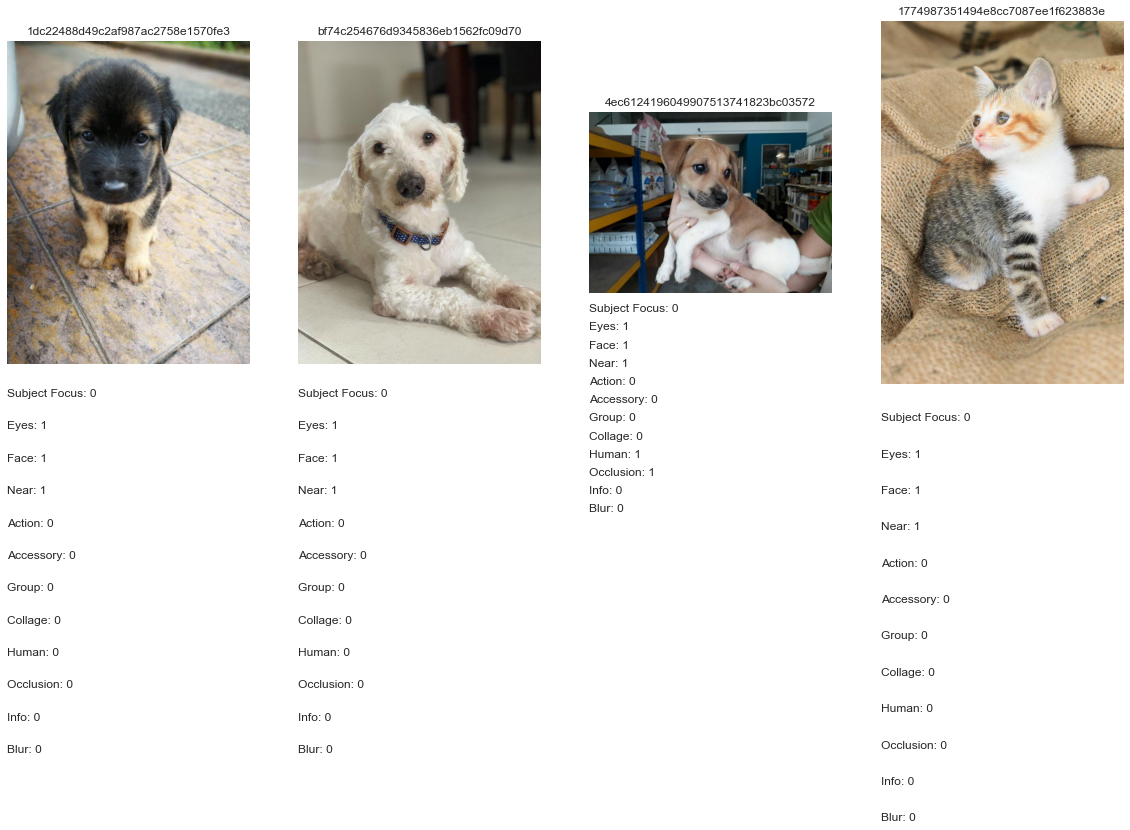

4 Random Images of Pets With Pawpularity Score 70


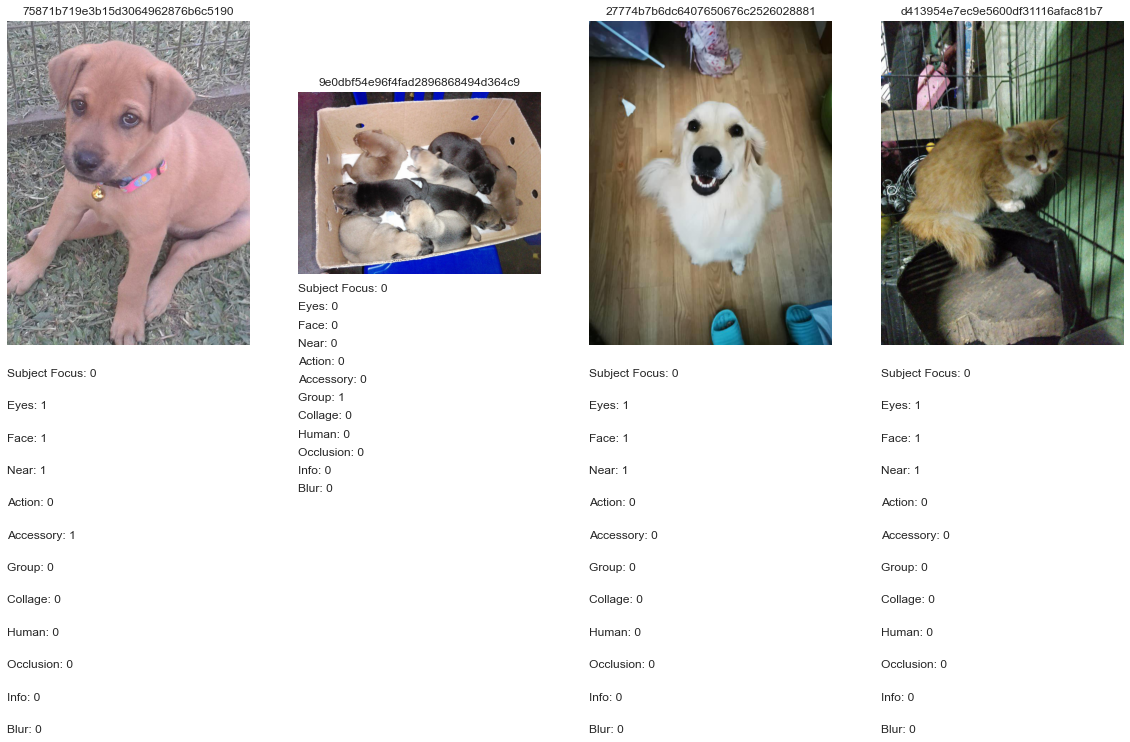

4 Random Images of Pets With Pawpularity Score 60


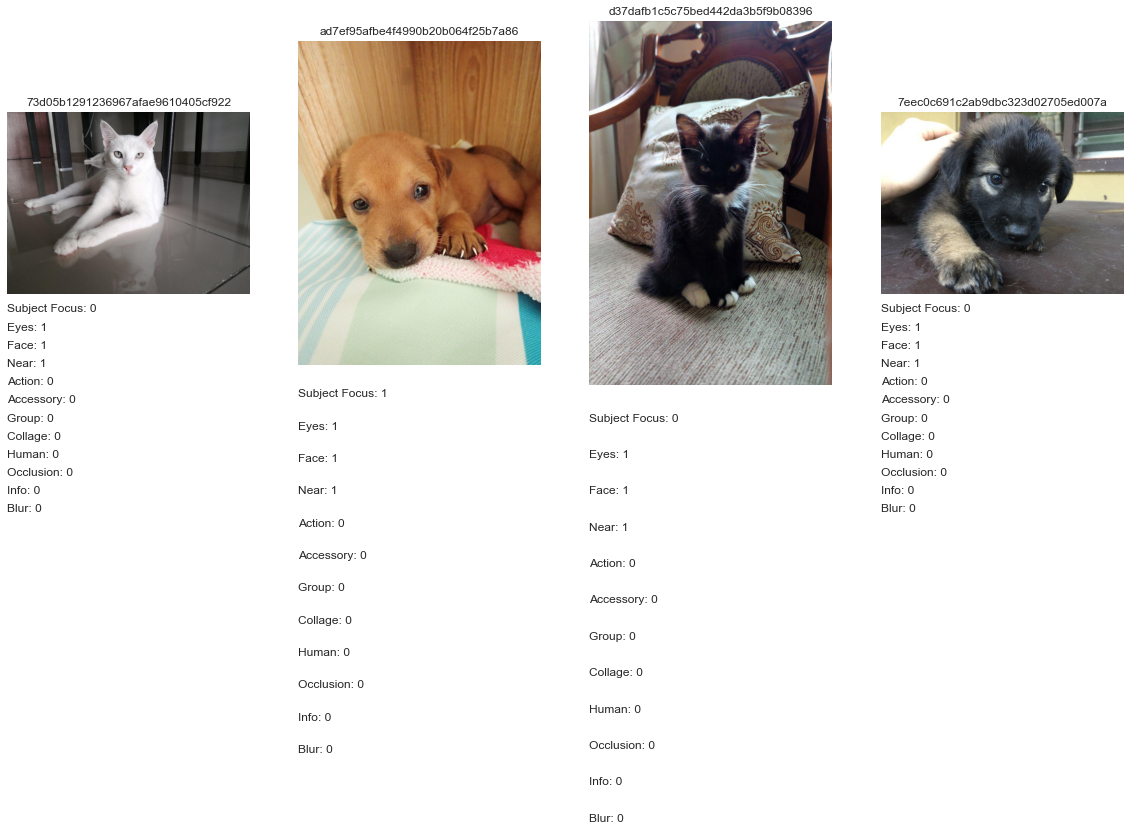

4 Random Images of Pets With Pawpularity Score 50


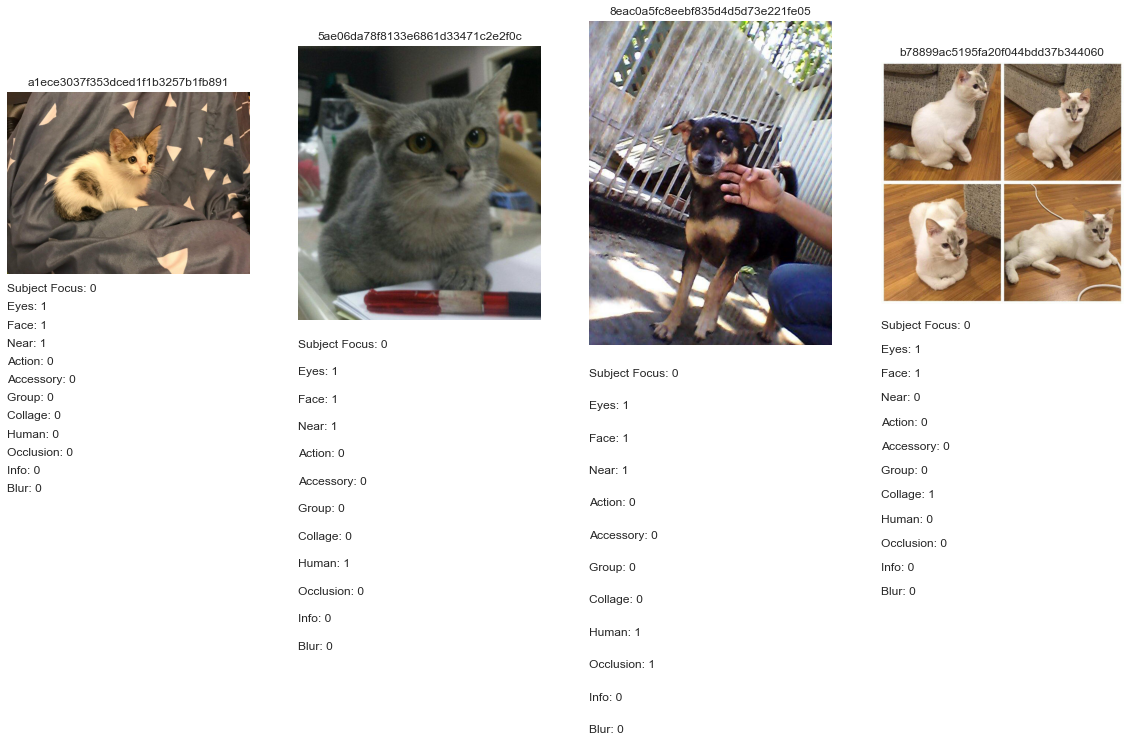

4 Random Images of Pets With Pawpularity Score 40


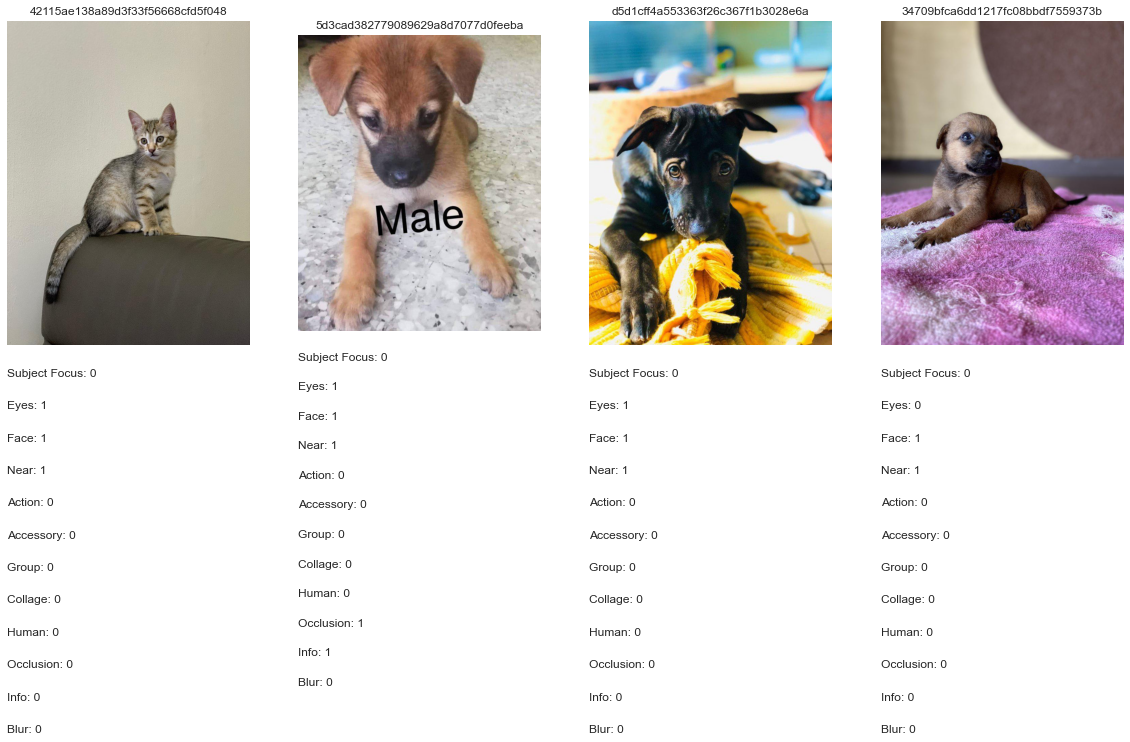

4 Random Images of Pets With Pawpularity Score 30


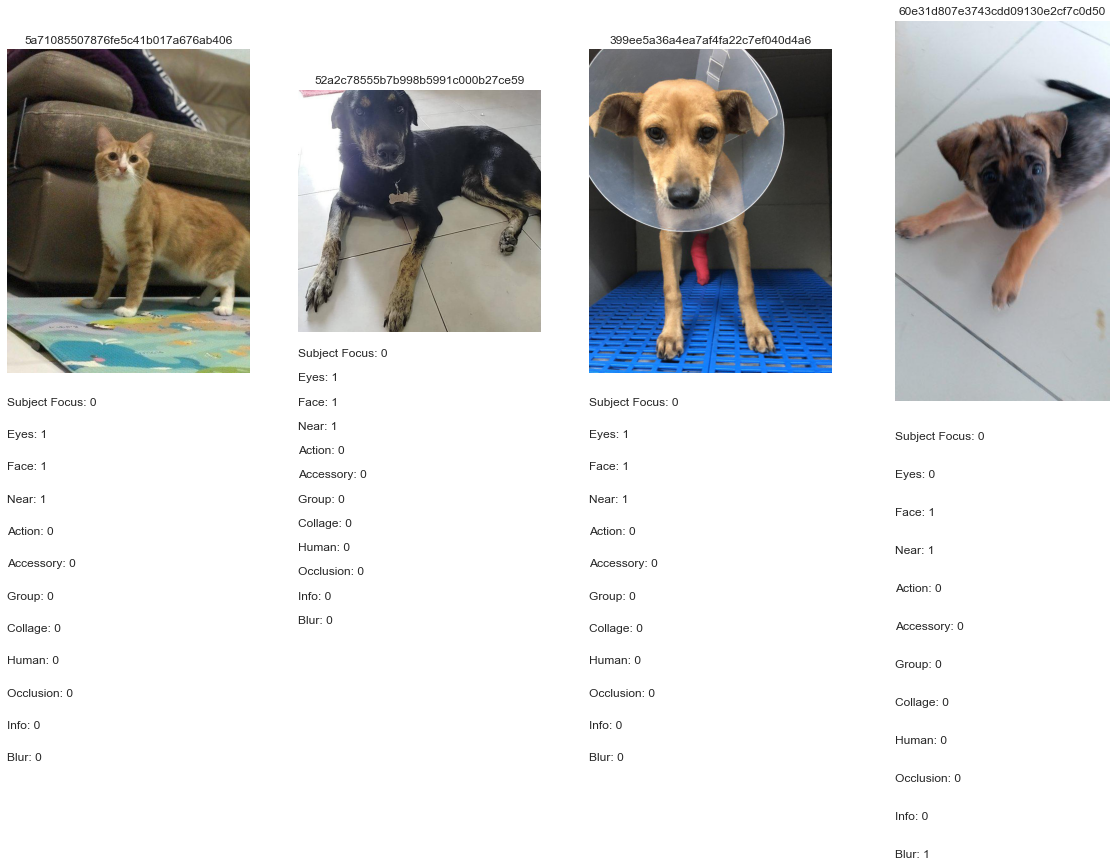

4 Random Images of Pets With Pawpularity Score 20


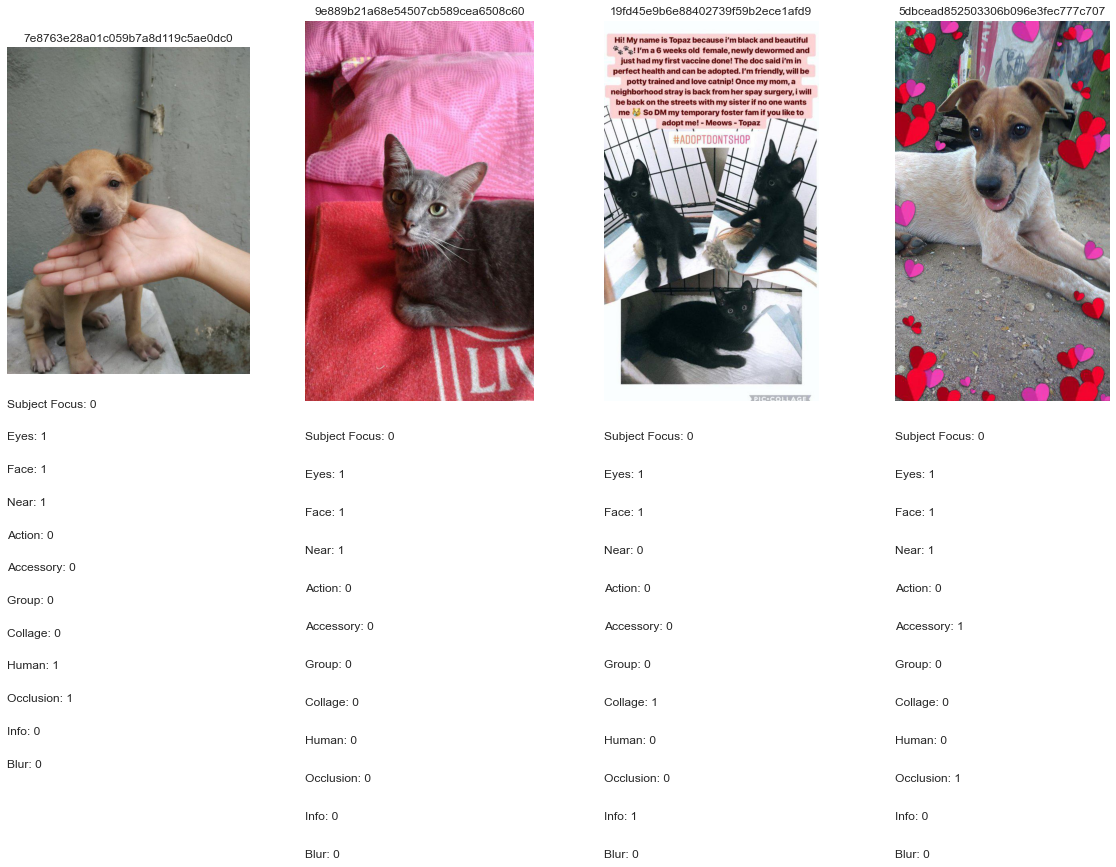

4 Random Images of Pets With Pawpularity Score 10


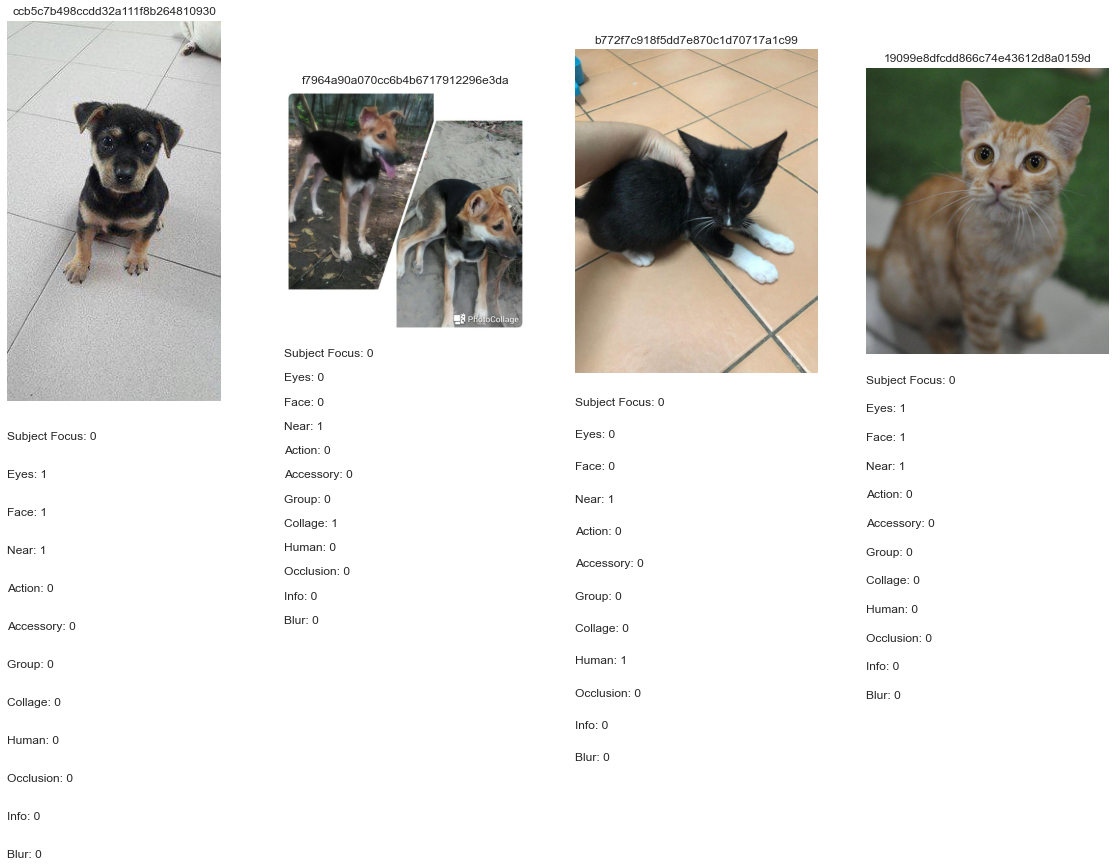

4 Random Images of Pets With Pawpularity Score 1


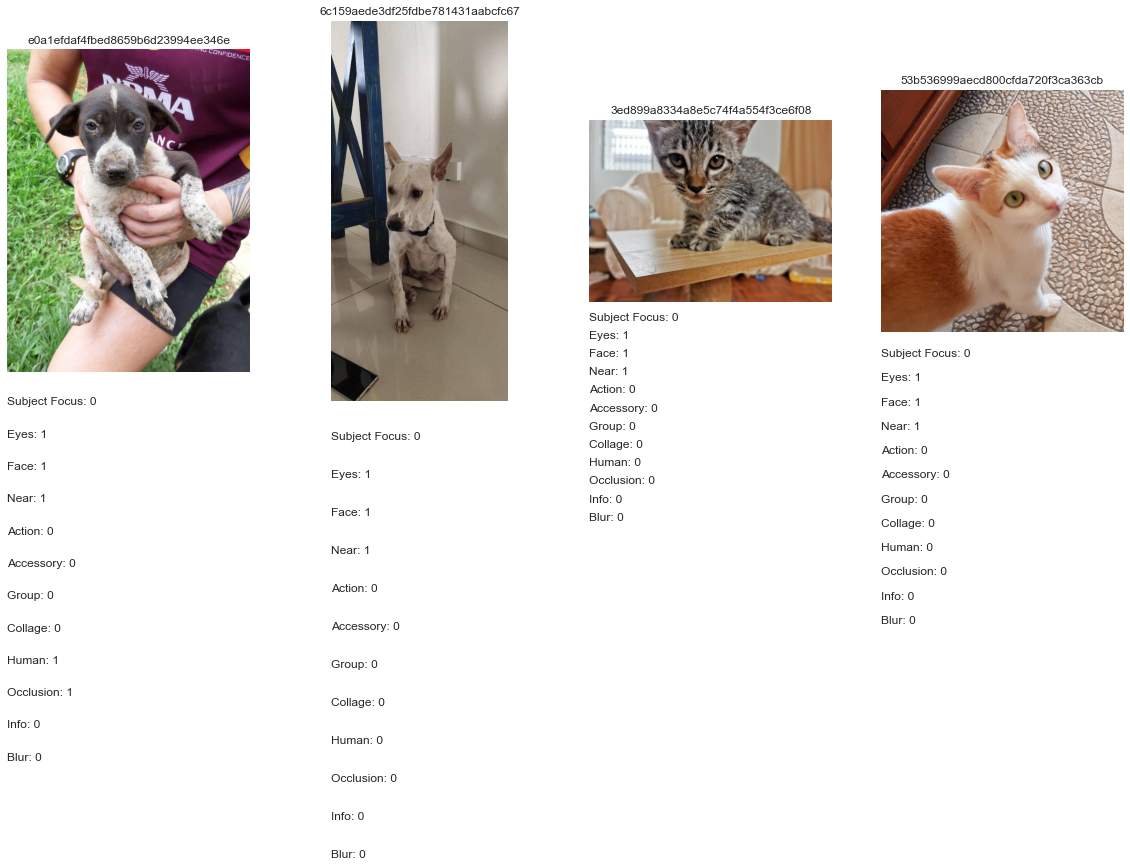

In [8]:
def pawpularity(df, num_img, score):

    random_state = 1
    random_sample = df[df["Pawpularity"] == score].sample(num_img, random_state=random_state).reset_index(drop=True)
    print(num_img, 'Random Images of Pets With Pawpularity Score', score)
    
    for x in range(num_img):
        path_stem = random_sample.iloc[x]['Id']
        root = '/Users/mychalsalgado/CS4662/petfinder-pawpularity-score/train/'
        extension = '.jpg'
        img_path = root + str(path_stem) + extension
         
        pawpularity_id = random_sample.iloc[x]['Pawpularity']
        feature_variables = random_sample.columns[1:-1]
        feature_values = random_sample.iloc[x][1:-1].to_dict()
    
        image_arr = plt.imread(img_path)
        
        plt.subplot(1, num_img, x+1)
        
        plt.title(path_stem)         
        plt.axis('off')
        
        ypos = -0.1
        for variable, value in feature_values.items():
            plt.text(0, ypos, f'{variable}: {value}', ha='left', transform=plt.gca().transAxes)
            ypos -= 0.1
        
        plt.imshow(image_arr)
        
    plt.show()
    plt.close()

pawpularity(df, 4, 100)
pawpularity(df, 4, 90)
pawpularity(df, 4, 80)
pawpularity(df, 4, 70)
pawpularity(df, 4, 60)
pawpularity(df, 4, 50)
pawpularity(df, 4, 40)
pawpularity(df, 4, 30)
pawpularity(df, 4, 20)
pawpularity(df, 4, 10)
pawpularity(df, 4, 1)

## Observations of Image Metadata

#### Upon examining the images we learned it will be necessary to reshape or resize the images when constructing our models. The presence of the number 3 at the end of the shape of our image arrays signifies that this is an RGB image, where each color channel contains pixel values ranging from 0 to 255. The metadata analysis showed that the pawpularity scores of the features had very similar distributions, which may pose a challenge for our algorithm to effectively utilize them. Since we couldn't accurately predict pawpularity based on the images and training data, we plan on employing machine learning algorithms with this task. 

#### Moving forward, we plan to use regression models with the metadata (.csv data) before applying computer vision techniques to build models using the images themselves.

In [ ]:
import cv2
import numpy as np

# Load the image
img = cv2.imread('image.jpg')

# Define the target size
target_size = (500, 500)

# Get the dimensions of the image
height, width, channels = img.shape

# Determine the padding required
pad_height = max(target_size[0] - height, 0)
pad_width = max(target_size[1] - width, 0)

# Add padding to the image
pad_top = pad_height // 2
pad_bottom = pad_height - pad_top
pad_left = pad_width // 2
pad_right = pad_width - pad_left

img_padded = cv2.copyMakeBorder(img, pad_top, pad_bottom, pad_left, pad_right, cv2.BORDER_CONSTANT, value=[0, 0, 0])

# Resize the image to the target size (optional)
img_resized = cv2.resize(img_padded, target_size)

# Save the padded and resized image
cv2.imwrite('padded_image.jpg', img_resized)
